In [1]:
import matplotlib.pyplot as plt

import numpy as np

from neurodsp.sim import sim_synaptic_current
from neurodsp.spectral import compute_spectrum
from neurodsp.plts import plot_power_spectra

import emd

### Simulate AMPA, NMDA and GABA synaptic currents

In [2]:
n_seconds = 20
fs = 1000

# AMPA; rise < 1ms; decay 0.5-2.0ms
sig_ampa = sim_synaptic_current(n_seconds, fs, tau_r=.25 / 1000, tau_d=1 / 1000)

# NMDA; rise: 5-8ms; decay: 100-250ms
sig_nmda = sim_synaptic_current(n_seconds, fs, tau_r=6 / 1000, tau_d=200 / 1000)

# GABA-A; rise: 0.5-2ms; decay: 10-50ms
sig_gaba = sim_synaptic_current(n_seconds, fs, tau_r=1 / 1000, tau_d=25 / 1000)

### Compute and Plot Spectra

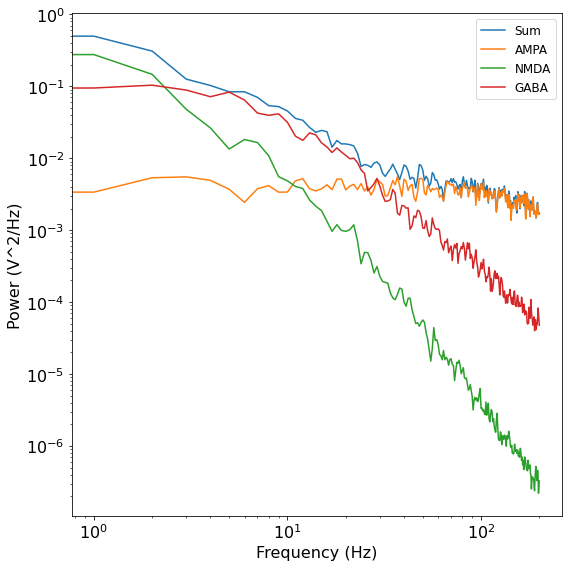

In [3]:
# Compute spectra
freqs_ampa, powers_ampa = compute_spectrum(sig_ampa, fs, f_range=(0, 200))

freqs_nmda, powers_nmda = compute_spectrum(sig_nmda, fs, f_range=(0, 200))

freqs_gaba, powers_gaba = compute_spectrum(sig_gaba, fs, f_range=(0, 200))

# Sum signals
sig = np.sum((sig_ampa, sig_nmda, sig_gaba), axis=0)

freqs, powers = compute_spectrum(sig, fs, f_range=(0, 200))

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

plot_power_spectra(freqs_ampa, [powers, powers_ampa, powers_nmda, powers_gaba],
                   labels=['Sum', 'AMPA', 'NMDA', 'GABA'], ax=ax)

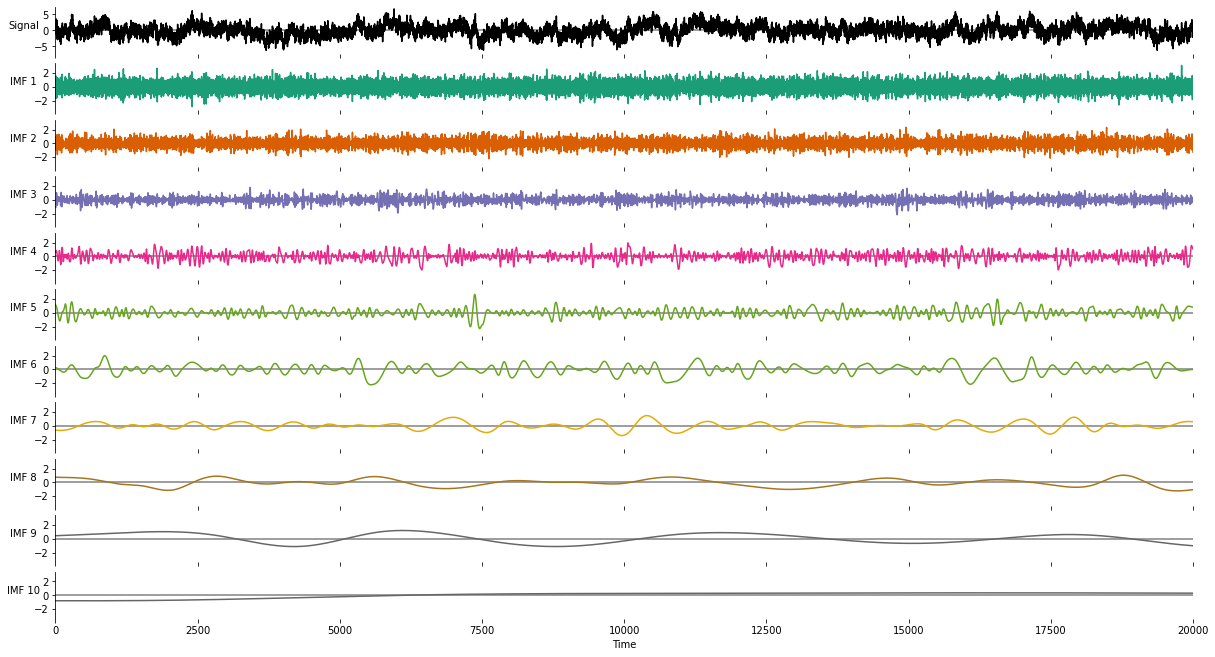

In [4]:
imf_opts={'sd_thresh': 0.1}

imf = emd.sift.sift(sig, imf_opts=imf_opts)

fig = plt.figure(figsize=(20, 10))

emd.plotting.plot_imfs(imf, cmap=True, scale_y=True, fig=fig)

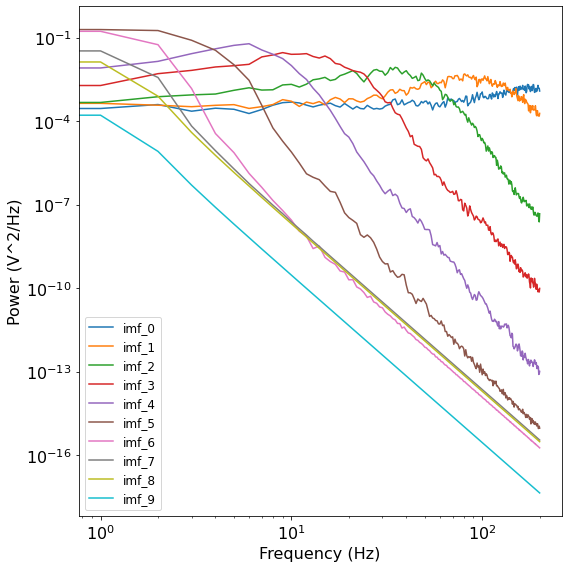

In [5]:
freqs_imf, powers_imf = compute_spectrum(imf.T, fs, f_range=(0, 200))

fig, ax = plt.subplots(figsize=(8, 8))

labels = ['imf_' + str(i) for i in range(len(powers_imf))]

plot_power_spectra(freqs_imf, powers_imf, labels=labels, ax=ax)

### Compare Modes to Each Synaptic Current

Spectra from low-frequency, 1/f-like modes are compared to spectra of the individual synaptic current spectra below. The indivdual synaptic currents have a flatter slopes than the lower frequency modes.

(1e-09, 1)

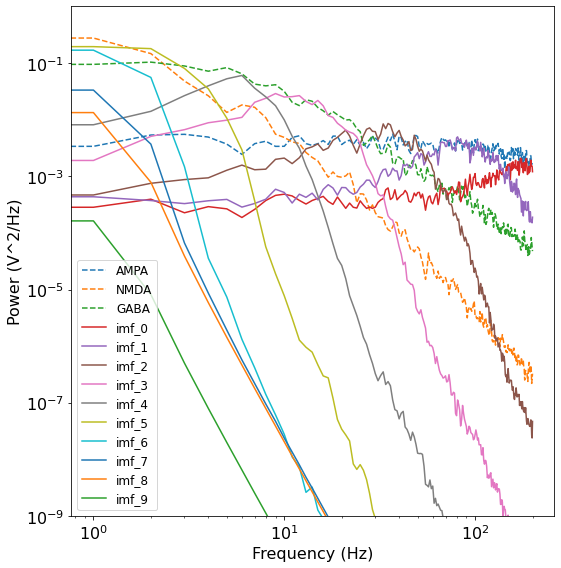

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

plot_power_spectra(freqs_ampa, [powers_ampa, powers_nmda, powers_gaba],
                   labels=['AMPA', 'NMDA', 'GABA'], ls='dashed', ax=ax)

plot_power_spectra(freqs_imf, powers_imf, labels=labels, ax=ax)

plt.ylim(10**-9, 10**0)

### Dropping Out Signals

Below, each signal is removed to examine their relative contributions to low frequency modes.

In [7]:
sig_rm_ampa = np.sum((sig_nmda, sig_gaba), axis=0)
imf_rm_ampa = emd.sift.sift(sig_rm_ampa, imf_opts=imf_opts)
      
sig_rm_nmda = np.sum((sig_ampa, sig_gaba), axis=0)
imf_rm_nmda = emd.sift.sift(sig_rm_nmda, imf_opts=imf_opts)
                      
sig_rm_gaba = np.sum((sig_ampa, sig_nmda), axis=0)
imf_rm_gaba = emd.sift.sift(sig_rm_gaba, imf_opts=imf_opts)                      

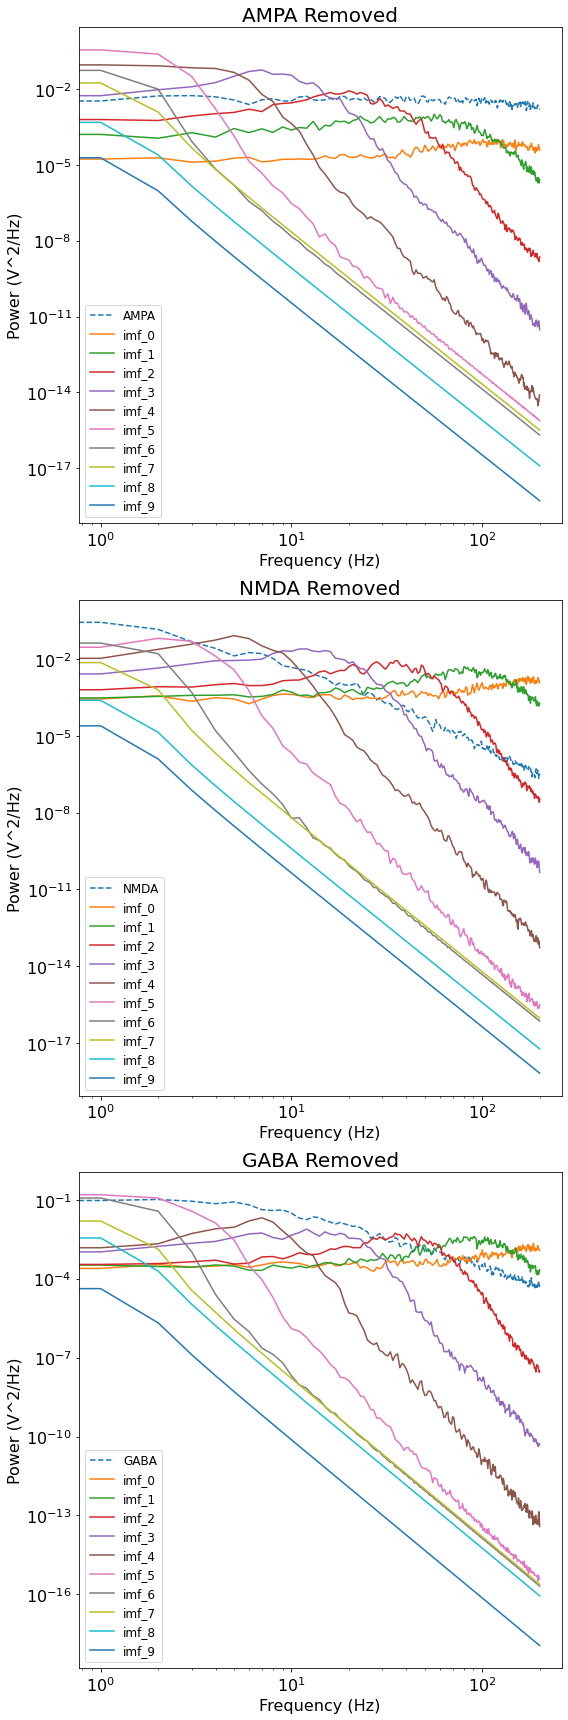

In [8]:
fig, axes = plt.subplots(figsize=(8, 24), nrows=3)
plot_power_spectra(freqs_ampa, powers_ampa, ax=axes[0], labels='AMPA', ls='dashed')
plot_power_spectra(freqs_nmda, powers_nmda, ax=axes[1], labels='NMDA', ls='dashed')
plot_power_spectra(freqs_gaba, powers_gaba, ax=axes[2], labels='GABA', ls='dashed')


titles = ['AMPA Removed', 'NMDA Removed', 'GABA Removed']

for ind, _imf in enumerate([imf_rm_ampa.T, imf_rm_nmda.T, imf_rm_gaba.T]):
    
    _freqs, _powers = compute_spectrum(_imf, fs, f_range=(0, 200))    

    labels = ['imf_' + str(i) for i in range(len(powers_imf))]

    plot_power_spectra(_freqs, _powers, labels=labels,
                       ax=axes[ind], title=titles[ind])